In [1]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모델들, 성능 평가
# (저는 일반적으로 정형데이터로 머신러닝 분석할 때는 이 2개 모델은 그냥 돌려봅니다. 특히 RF가 테스트하기 좋습니다.)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMClassifier
from lightgbm.sklearn import LGBMRegressor

# 상관관계 분석, VIF : 다중공선성 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor

# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from functools import partial

from sklearn.cluster import DBSCAN

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_path='/content/drive/MyDrive/minipjt34/'

In [4]:
# 데이터를 불러옵니다.
train =pd.read_csv(base_path + 'train_V2.csv')
test = pd.read_csv(base_path + 'test_V2.csv')
submission = pd.read_csv(base_path + 'sample_submission_V2.csv')

In [6]:
len(train)

4446966

In [5]:
train=train.dropna()

In [6]:
temp1=train.copy()

In [8]:
def seek_bug_group_min(temp, match, min_num):

    group_i = temp.loc[temp.matchType == match,:]

    min_i = group_i[group_i['numGroups']<min_num]

    return min_i


def seek_bug_group_max(temp, match, max_num):

    group_i = temp.loc[temp.matchType == match,:]

    max_i = group_i[group_i['numGroups']>max_num]

    return max_i

# squad min bug
squad_min_bug = seek_bug_group_min(temp1, 'squad', 25)
squad_fpp_min_bug = seek_bug_group_min(temp1, 'squad-fpp', 25)
normal_squad_fpp_min_bug = seek_bug_group_min(temp1, 'normal-squad-fpp', 25)
normal_squad_min_bug = seek_bug_group_min(temp1, 'normal-squad', 25)

# duo min bug
duo_min_bug = seek_bug_group_min(temp1, 'duo', 44)
duo_fpp_min_bug = seek_bug_group_min(temp1, 'duo-fpp', 44)
normal_duo_fpp_min_bug = seek_bug_group_min(temp1, 'normal-duo-fpp', 44)
normal_duo_min_bug = seek_bug_group_min(temp1, 'normal-duo', 44)


# solo min bug
solo_fpp_min_bug = seek_bug_group_min(temp1, 'solo-fpp', 85)
solo_min_bug = seek_bug_group_min(temp1, 'solo', 85)
normal_solo_fpp_min_bug = seek_bug_group_min(temp1, 'normal-solo-fpp', 85)
normal_solo_min_bug = seek_bug_group_min(temp1, 'normal-solo', 85)

# squad max bug
squad_max_bug = seek_bug_group_max(temp1, 'squad', 32)
squad_fpp_max_bug = seek_bug_group_max(temp1, 'squad-fpp', 32)
normal_squad_fpp_max_bug = seek_bug_group_max(temp1, 'normal-squad-fpp', 32)
normal_squad_max_bug = seek_bug_group_max(temp1, 'normal-squad', 32)

# duo max bug
duo_max_bug= seek_bug_group_max(temp1, 'duo', 50)
duo_fpp_max_bug = seek_bug_group_max(temp1, 'duo-fpp', 50)
normal_duo_fpp_max_bug = seek_bug_group_max(temp1, 'normal-duo-fpp', 50)
normal_duo_max_bug = seek_bug_group_max(temp1, 'normal-duo', 50)

# solo max bug
solo_max_bug = seek_bug_group_max(temp1, 'solo', 100)
solo_fpp_max_bug = seek_bug_group_max(temp1, 'solo-fpp', 100)
normal_solo_fpp_max_bug = seek_bug_group_max(temp1, 'normal-solo-fpp', 100)
normal_solo_max_bug = seek_bug_group_max(temp1, 'normal-solo', 100)
# squad min bug
print(squad_min_bug,
'================================',
squad_fpp_min_bug,
'================================',
normal_squad_fpp_min_bug,
'================================',
normal_squad_min_bug, 
'================================',sep='\n')

# duo min bug
print(duo_min_bug,
'================================',
duo_fpp_min_bug,
'================================',
normal_duo_fpp_min_bug,
'================================',
normal_duo_min_bug,
'================================',sep='\n')


# solo min bug
print(solo_fpp_min_bug,
'================================',
solo_min_bug,
'================================',
normal_solo_fpp_min_bug,
'================================',
normal_solo_min_bug, 
'================================',sep='\n')

# squad max bug
print(squad_max_bug,
'================================',
squad_fpp_max_bug,
'================================',
normal_squad_fpp_max_bug,
'================================',
normal_squad_max_bug, 
'================================',sep='\n')

# duo max bug
print(duo_max_bug,
'================================',
duo_fpp_max_bug,
'================================',
normal_duo_fpp_max_bug,
'================================',
normal_duo_max_bug, 
'================================',sep='\n')

# solo max bug
print(solo_max_bug,
'================================',
solo_fpp_max_bug,
'================================',
normal_solo_fpp_max_bug,
'================================',
normal_solo_max_bug, 
'================================',sep='\n')

                     Id         groupId         matchId  assists  boosts  \
133      9c0e63787ad038  c8ab4c44f2c84e  0bf9add87c7ec6        0       0   
369      b3f3ae8346665a  8838e498e6586e  0d0d51ca54ab0c        0       4   
564      b49d587129dfae  4d37a7448c91e2  e3abdc3373a559        0       1   
597      312996fc8f5b9b  5a6916cb7d67c3  18fd0a03065ea9        1       0   
611      f5e8e2ecdf91be  16605129ae9912  d80732c97da80b        0       0   
...                 ...             ...             ...      ...     ...   
4446767  796c1c11a54741  97a5f02b760c0b  8b8b67bf23363e        0       0   
4446779  dec9a10a058c9c  3c66fb620b3631  a83fe9ee429644        0       0   
4446787  d7c45214b08e46  93f1be5e2a73fc  cd87b92930dc27        1       1   
4446810  a279d9c32b95d4  a962428d9ef224  56ae0fc4a08642        0       0   
4446915  935c036761948b  bd1398a504c57a  bc5890e157e81b        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
133      

In [9]:
temp_1_min = pd.concat([squad_min_bug, squad_fpp_min_bug, normal_squad_fpp_min_bug, normal_squad_min_bug,
                    duo_min_bug, duo_fpp_min_bug, normal_duo_fpp_min_bug, normal_duo_min_bug, 
                    solo_fpp_min_bug, solo_min_bug, normal_solo_fpp_min_bug, normal_solo_min_bug], axis=0)
temp1_max = pd.concat([squad_max_bug, squad_fpp_max_bug, normal_squad_fpp_max_bug, normal_squad_max_bug,
                      duo_max_bug, duo_fpp_max_bug, normal_duo_fpp_max_bug, normal_duo_max_bug, 
                      solo_max_bug, solo_fpp_max_bug, normal_solo_fpp_max_bug, normal_solo_max_bug], axis=0)
temp_bug = pd.concat([temp1_max, temp_1_min], axis=0)
temp2=temp1.drop(temp_bug.index, axis=0)

In [10]:
#결측치 제거 데이터 전과 후
print(temp1.shape , temp2.shape)

(4446965, 29) (4049436, 29)


In [11]:
# 이벤트 제거
temp2 = temp2.drop(temp2[temp2.matchType.str.contains("flare")].index, axis=0)
temp2 = temp2.drop(temp2[temp2.matchType.str.contains("crash")].index, axis=0)
temp2

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [12]:
temp3=temp2[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
        'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
        'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
        'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]

In [19]:
temp2.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'match_3'],
      dtype='object')

In [13]:
columns_name=temp3.columns.tolist()

In [86]:
pd.set_option('display.max_columns', None)

In [15]:
len(columns_name)


19

In [15]:
def match(x):
  if x == 'squad'or x== 'squad-fpp'or x=='normal-squad-fpp' or x=='normal-squad' :
    return "squad"
  elif x == 'duo' or x=='duo-fpp' or x== 'normal-duo-fpp' or x== 'normal-duo' :
    return "duo"
  else :
    return "solo"



In [16]:
temp2["match_3"]=temp2["matchType"].map(match)

In [17]:
temp2["match_3"].unique()

array(['squad', 'duo', 'solo'], dtype=object)

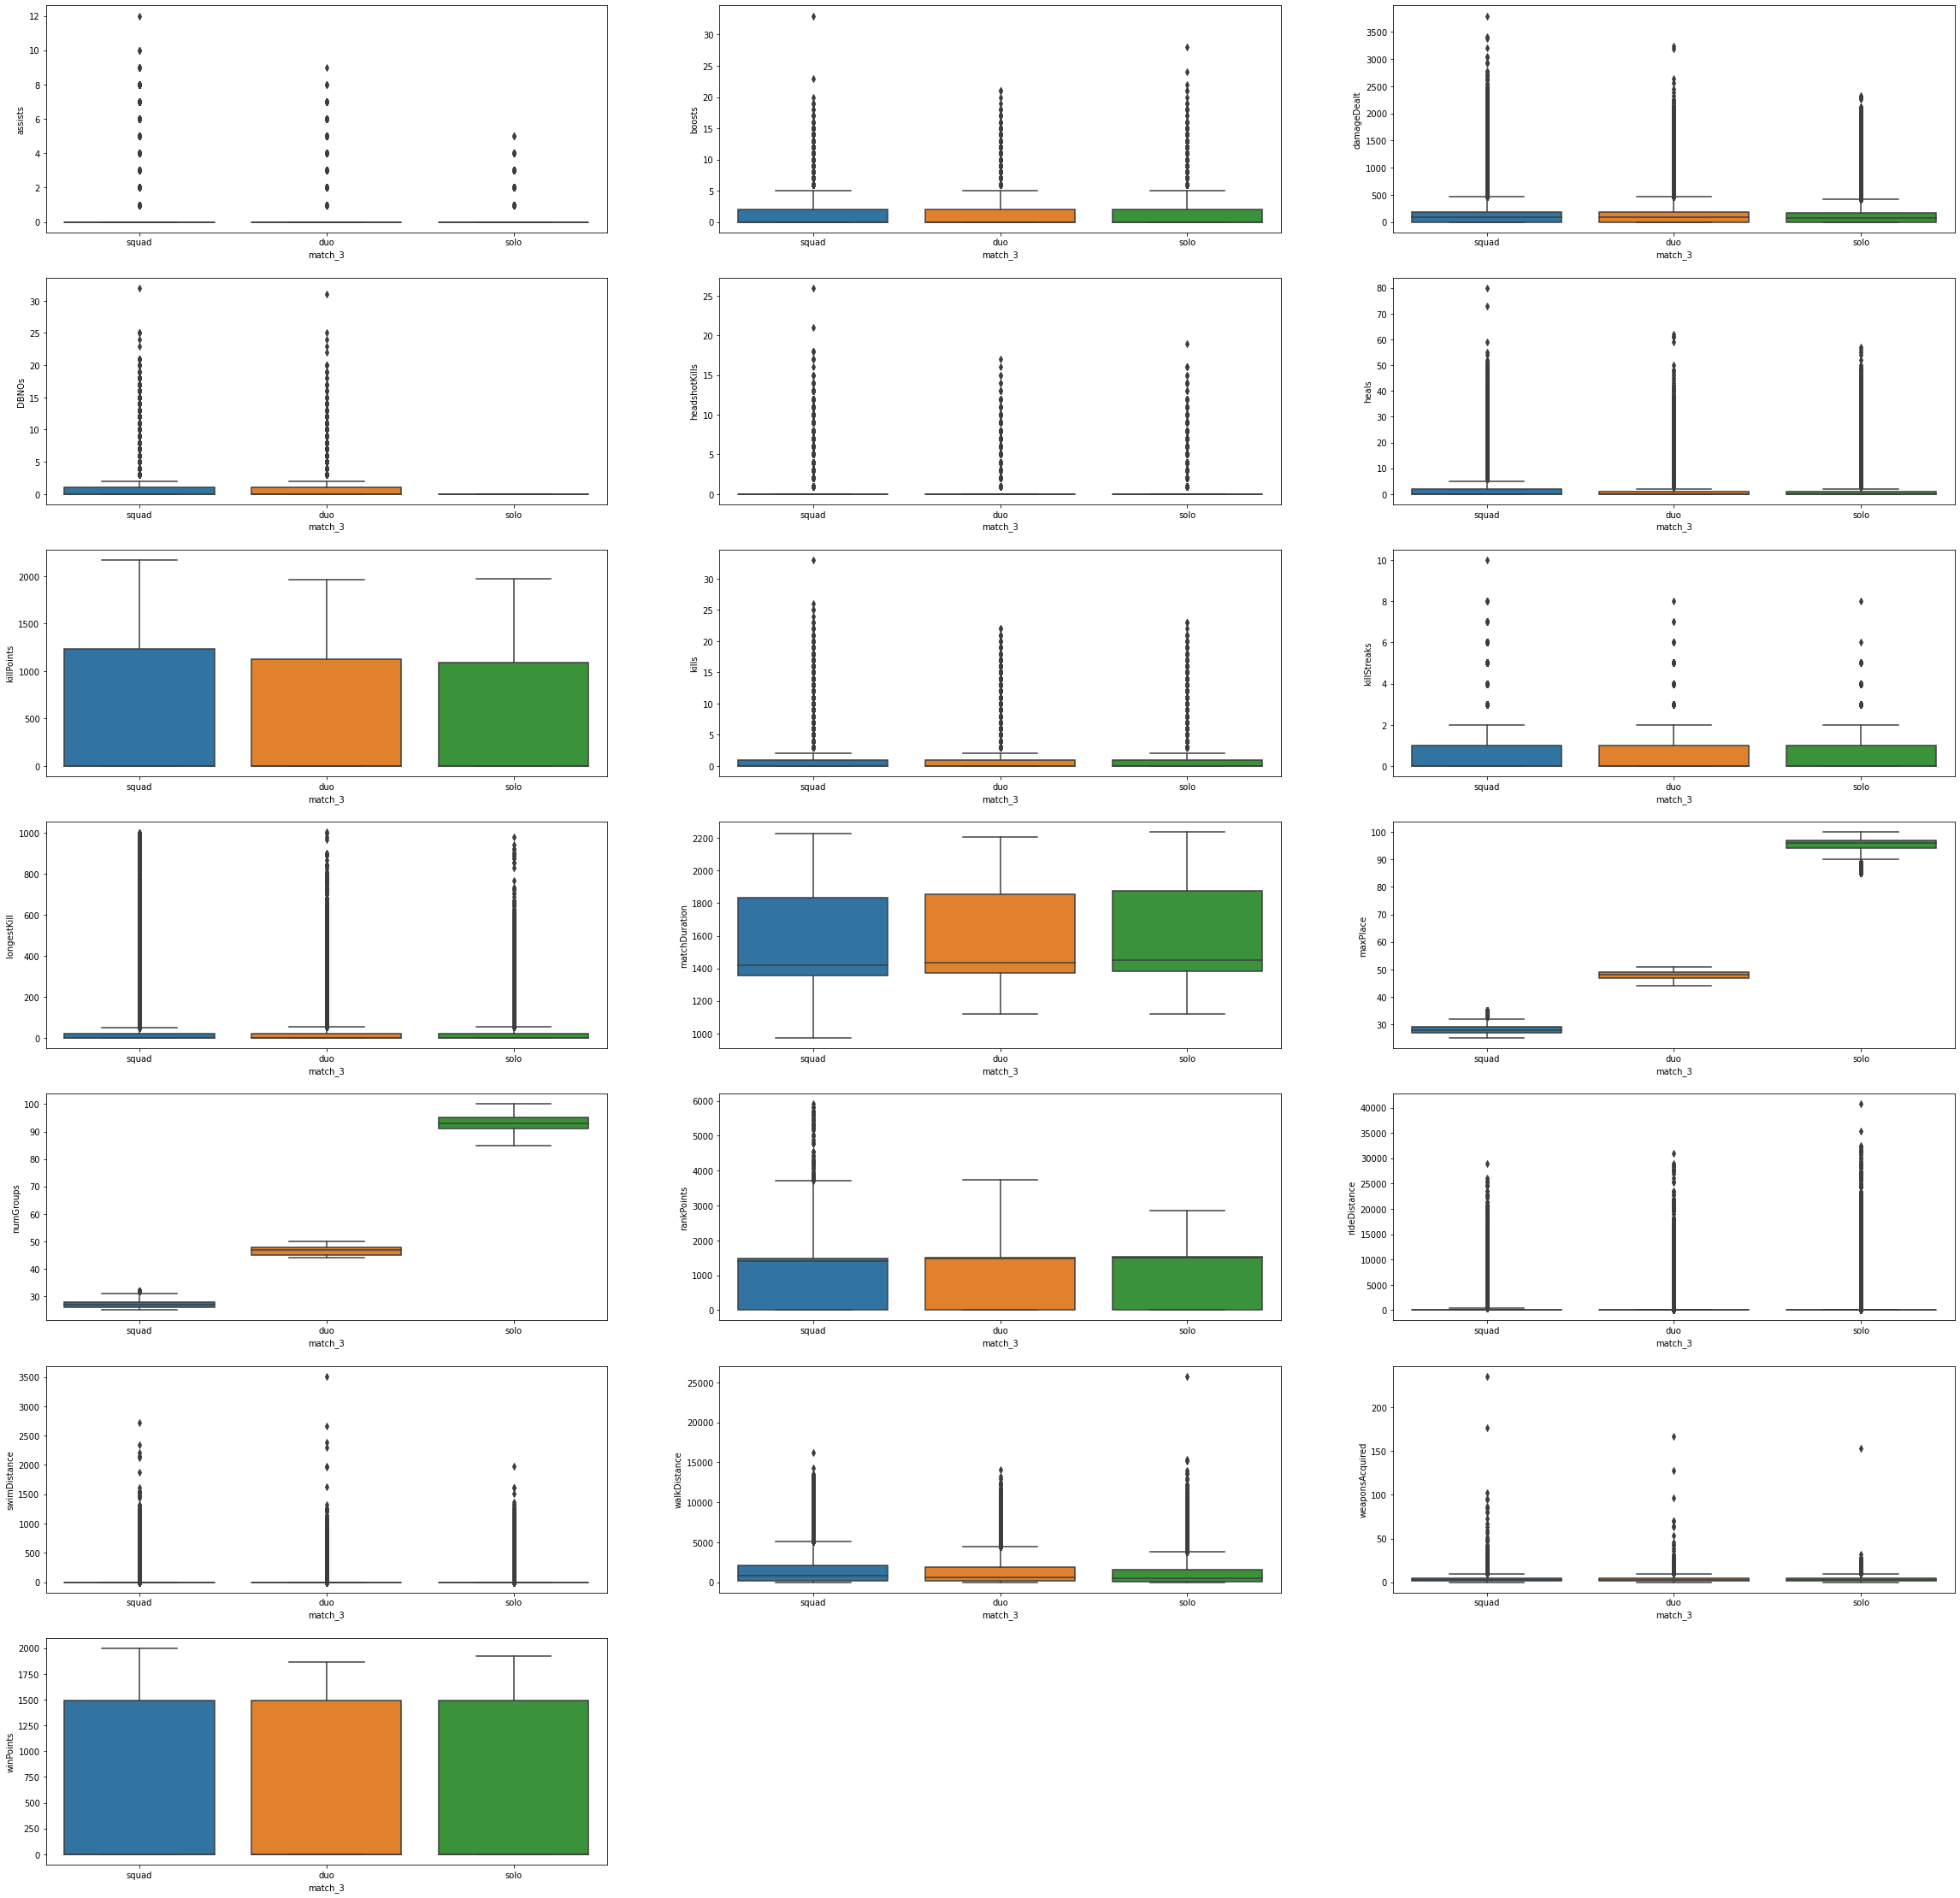

In [ ]:
plt.figure(figsize=(40,40))
n=1
for i in range(len(columns_name)):
  plt.subplot(7,3,n)
  sns.boxplot(data=temp3, y=temp3[columns_name[i]],  x=temp2["match_3"])
  n+=1
plt.show() 

In [24]:
def count_box(col):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  sns.countplot(data=temp3, x=temp3[col])
  plt.subplot(1,2,2)
  sns.boxplot(data=temp3, y=temp2['winPlacePerc'],  x=temp3[col])
  
    
  return plt.show() 

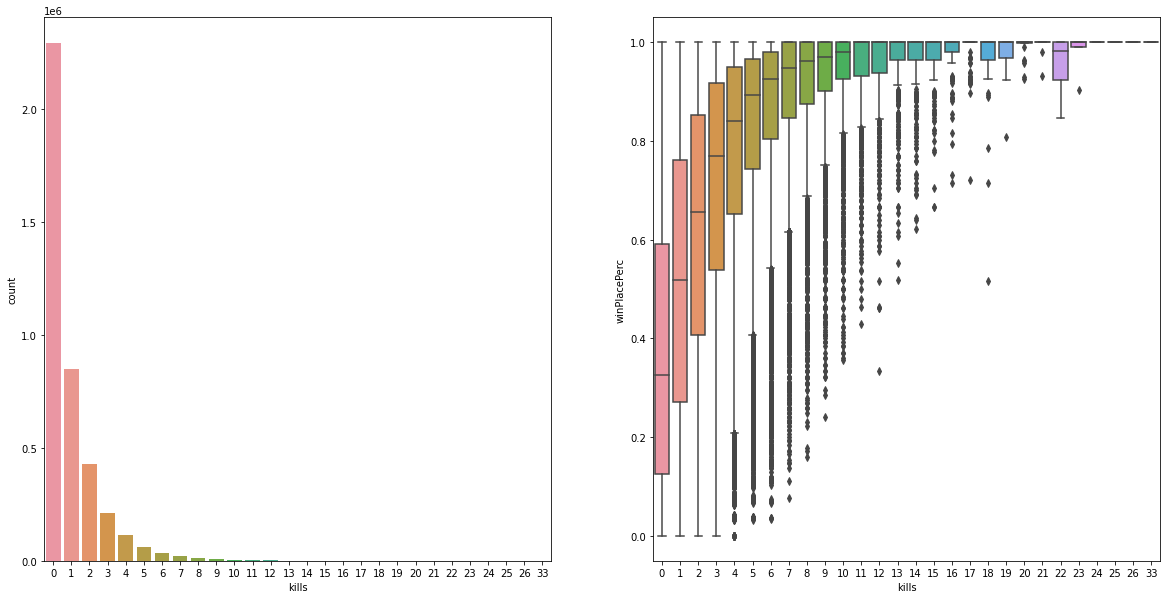

In [28]:
count_box("kills")

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPoints
54350,0,0,0.0,0,0,0,1316,0,0,0.0,1753,30,30,-1,0.0,0.1673,0.0,0,1501
120025,0,0,0.0,0,0,0,1329,0,0,0.0,1378,26,26,-1,0.0,0.0000,0.0,0,1528
120666,0,0,0.0,0,0,0,1014,0,0,0.0,1468,27,26,-1,0.0,3.3120,0.0,0,1502
122281,0,0,0.0,0,0,0,0,0,0,0.0,1963,28,28,1420,0.0,0.1368,0.0,0,0
182070,0,0,0.0,0,0,0,0,0,0,0.0,1868,28,28,1480,0.0,0.0000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252774,0,0,0.0,0,0,0,0,0,0,0.0,1311,28,28,1398,0.0,0.0000,0.0,0,0
4266459,0,0,0.0,0,0,0,0,0,0,0.0,1762,28,27,1501,0.0,0.0000,0.0,0,0
4329316,0,0,0.0,0,0,0,1117,0,0,0.0,1372,30,29,-1,0.0,0.0000,0.0,0,1499
4384705,0,0,0.0,0,0,0,0,0,0,0.0,1799,29,27,1496,0.0,0.0000,0.0,0,0


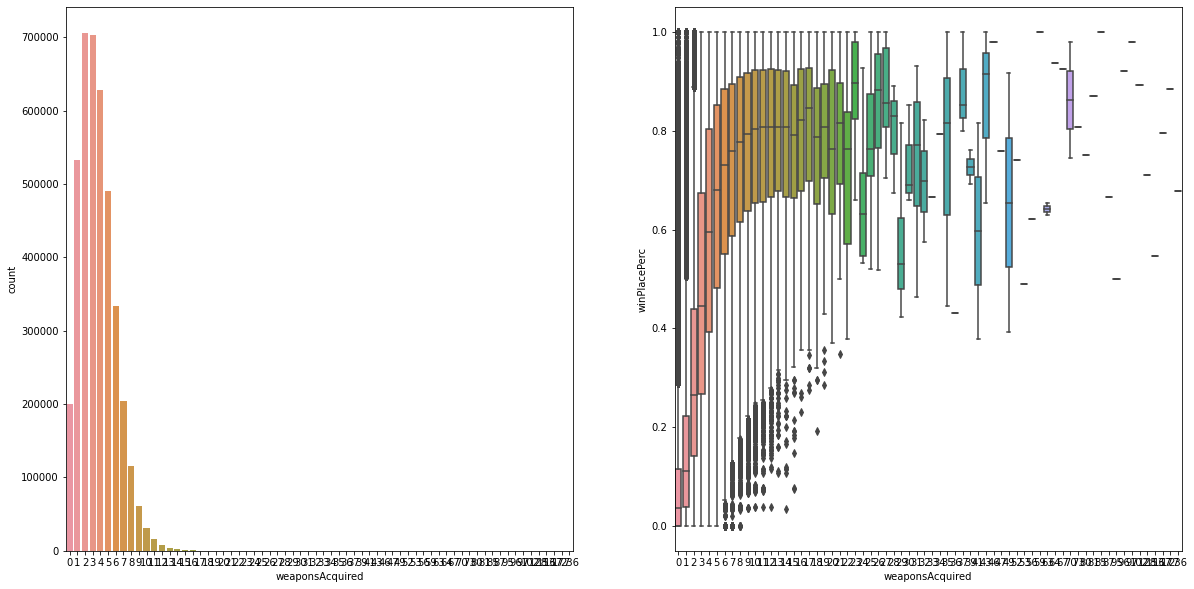

In [31]:
count_box('weaponsAcquired')

In [66]:
#무기가 없는데 어떻게 살았을까?
#무기가 없는데 어떻게 죽였을까? - > 2759명 중 563명만이 ride했음. 심지어 18명은 데미지딜도 없음
temp2[(temp2["kills"]>0 )& (temp2['weaponsAcquired']==0)&(temp2['rideDistance']>0) & (temp2['damageDealt']==0)].T

,43928,803939,825667,1474572,1663007,1914850,2191533,3024941,3323794,3353981,3399937,3406511,3434184,3443530,3712697,3978865,4069858,4338875
Id,52dd7c85c0fa24,97bb95a777c67b,3afeaa6d587469,3519c0776bcbf8,940875d94c1e0c,be44915e728028,3ea96e6bfcf47b,357b997e2f1918,ce295812240348,d5f2b316f9eb8e,81a917d343f678,206ff7aa1f1334,91dbcde65fb125,1652c920a16f66,f95677d20fd621,e748cf6fe5cce8,04130167e2ce4a,1bf19e6530c384
groupId,c4ac82032d7449,4563670ca93821,cfab871f9636b4,cc0f7324bf3b34,434d776bae601a,f2d66995cbd92c,c58a1626bdd447,8e6f760e6235dd,8c7ede7a08f313,32744229ccd1ad,e2911168dc46de,eb0dcf4cd5352f,692e65a0c35318,492c593f63ac12,6f50a937f855a0,b71c3aabc663ed,9f91e1c9294ecb,5fb60f1edfd3af
matchId,b51a50c4f1cf74,3de7c412ccc316,ecda8fd51a84a1,3f120491309244,5547cb18a84779,c9ba3c2ef7f1a4,eb2f03d5ea377f,e17052a25d485c,ece19031d26776,270107440d3bd4,8a3903eef322e5,1ab3335fd4dab0,516a185e4ed990,a2938ac4538c63,503438d6573a6b,dc4037c011626a,d383e67d661b5b,ef66d326c8adf5
assists,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
boosts,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
damageDealt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DBNOs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
headshotKills,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
heals,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
killPlace,20,37,36,36,35,25,30,38,28,15,36,30,41,29,46,37,32,40


In [82]:
temp2[(temp2["kills"]>0 )& (temp2['weaponsAcquired']==0)&(temp2['rideDistance']==0) &(temp2['walkDistance']==0)&(temp2['swimDistance']==0)& (temp2['damageDealt']==0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,match_3


In [90]:
test=temp2[(temp2["kills"]>0 )& (temp2['weaponsAcquired']==0)&(temp2['rideDistance']==0) &(temp2['walkDistance']==0)&(temp2['swimDistance']==0)]


In [ ]:
train[train['matchId']=='6680c7c3d17d48'].sort_values("groupId").T #47개 참가한 경기지만 kill수가 많은 경우.


In [123]:
train[train['matchId']=='08e4c9e6c033e2'] #1인 개인전으로 18명이 참가했으니 킬수가 66까지 나옴.


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
467367,5b6a7f17975ab4,2776f0005b3847,08e4c9e6c033e2,5,0,1949.0,0,6,11,6,0,18,2,62.57,1390,normal-solo-fpp,18,12,1500,0,0.0,0,0.0,0,0,166.10,45,0,0.7059
614345,ad4b188d047dde,34062a2e342e12,08e4c9e6c033e2,5,0,1128.0,0,1,3,11,0,9,1,70.44,1390,normal-solo-fpp,18,12,1500,0,0.0,0,0.0,0,0,30.50,49,0,0.5294
1248348,80ac0bbf58bfaf,1e54ab4540a337,08e4c9e6c033e2,5,0,6375.0,0,21,4,1,0,66,8,319.90,1390,normal-solo-fpp,18,12,1500,0,0.0,0,0.0,0,0,1740.00,23,0,1.0000
1294219,54001b301772b1,fb025eb3fff625,08e4c9e6c033e2,2,0,901.0,0,0,5,13,0,6,1,117.70,1390,normal-solo-fpp,18,12,1500,0,0.0,0,0.0,0,0,678.70,31,0,0.3529
1387665,2ccf7ec2f29c5a,079919b59ead49,08e4c9e6c033e2,1,0,589.1,0,0,16,12,0,6,1,56.92,1390,normal-solo-fpp,18,12,1500,0,0.0,0,0.0,0,0,155.10,25,0,0.9412
1433667,916c2146508953,1e54ab4540a337,08e4c9e6c033e2,1,0,977.9,0,1,4,9,0,9,2,57.45,1390,normal-solo-fpp,18,12,1500,0,0.0,0,0.0,0,0,38.66,42,0,1.0000
1671589,e9e281aad928c4,9c84af8a0dfce0,08e4c9e6c033e2,4,0,878.5,0,0,3,16,0,4,1,69.13,1390,normal-solo-fpp,18,12,1500,0,1631.0,0,0.0,0,0,2051.00,41,0,0.1765
1799059,eef5fd29a7899a,9c84af8a0dfce0,08e4c9e6c033e2,2,0,348.4,0,0,0,17,0,4,1,154.10,1390,normal-solo-fpp,18,12,1500,0,0.0,0,0.0,0,0,886.50,29,0,0.1765
2251960,863202ef81f909,e635ea13aace3e,08e4c9e6c033e2,2,0,398.1,0,0,4,18,0,3,1,33.82,1390,normal-solo-fpp,18,12,1500,0,2006.0,0,0.0,0,0,2195.00,32,0,0.0000
2609535,8ea8ba460f109a,67dcd3b23d120e,08e4c9e6c033e2,1,0,1057.0,0,2,1,8,0,11,2,170.20,1390,normal-solo-fpp,18,12,1500,0,3441.0,0,0.0,0,0,1382.00,45,0,0.5882


In [5]:
temp=train.copy()

In [29]:
agg = temp.groupby('groupId').size().to_frame('playerinGame')
temp = temp.merge(agg, how='left', on='groupId')

#  solo게임 그룹인원 전처리
temp.loc[(temp['matchType'].str.contains('solo')) & (temp['playerinGame'] != 1), 'playerinGame'] = 1

# duo게임 그룹인원 전처리
temp.loc[(temp['matchType'].str.contains('duo')) & (temp['playerinGame'] > 2), 'playerinGame'] = 2

# squad게임 그룹인원 전처리
temp.loc[(temp['matchType'].str.contains('squad')) & (temp['playerinGame'] > 4), 'playerinGame'] = 4 

In [8]:
#경기인원당 kills 구하기


In [72]:
#matchId 당 참가인원 "peolpe_in_match"



In [7]:
temp['peolpe_in_match']=temp.groupby("matchId")["Id"].transform('count')

In [8]:
temp["kills_sum"]=temp.groupby("matchId")['kills'].transform('sum')

In [10]:
temp.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerinGame,peolpe_in_match,kills_sum
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.8,1,1466,0.4444,4,96,84
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.0,5,0,0.6400,4,91,83


In [12]:
temp_error=temp[temp["kills_sum"]>temp["peolpe_in_match"]]

In [14]:

temp_error.index

Int64Index([   1292,    1351,    1417,    1824,    2769,    3446,    3880,
               4752,    5077,    5479,
            ...
            4441099, 4441511, 4442534, 4442804, 4443350, 4444608, 4445246,
            4446353, 4446375, 4446682],
           dtype='int64', length=9039)

In [16]:
temp=temp.drop(index=temp_error.index)

In [18]:
#데이터 전처리로 9039 행 제거
len(train)-len(temp)

9039

In [32]:
temp[temp["matchId"]=='cc05e88775030c']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,peolpe_in_match,kills_sum,playerinGame
22767,37e110f7304d73,00e1240af97b6d,cc05e88775030c,0,0,0.00,0,0,4,65,...,0.0,0,0,962.00,4,0,0.2609,88,79,11
64430,895c9bc8768006,c779c6ba853423,cc05e88775030c,0,2,309.80,2,1,1,8,...,0.0,0,0,1879.00,5,0,0.3043,88,79,2
82108,e91f8820c2625f,40237a0a012c99,cc05e88775030c,1,1,76.78,0,0,4,45,...,0.0,0,0,2406.00,5,0,0.8261,88,79,2
216721,82546536c21d43,202e5d349e1431,cc05e88775030c,0,0,0.00,0,0,0,84,...,0.0,0,0,642.60,1,0,0.0435,88,79,6
228659,5e2795071d36d4,787d5a0983f237,cc05e88775030c,0,0,19.35,0,0,0,57,...,0.0,0,0,1829.00,4,0,0.3913,88,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075395,cb03aacf69fe2c,5f7629870e506a,cc05e88775030c,0,0,0.00,0,0,0,87,...,0.0,0,0,68.94,1,0,0.0000,88,79,7
4111778,35c1f1bfb22ce0,d2717e657b004a,cc05e88775030c,0,1,86.01,2,0,2,27,...,0.0,0,0,641.10,2,0,0.2174,88,79,7
4274118,1592dc93dae390,9c0849e91f50f7,cc05e88775030c,1,4,0.00,0,0,5,42,...,0.0,0,0,1942.00,8,0,0.9130,88,79,4
4318450,c410ad5bb7266e,202e5d349e1431,cc05e88775030c,0,0,100.00,1,0,0,36,...,0.0,0,0,204.60,3,0,0.0435,88,79,6


In [35]:
temp[temp["playerinGame"]>4].sort_values("groupId").T

,208431,1943617,548583,3788240,904920,2213105,728943,1999709,4044920,2044169,...,126048,1734519,2479343,4180940,3687139,3404152,2454350,1497888,1575307,1668328
Id,af2e3eaa7a32bf,d8c68aab15d9de,157545bfb16abf,9153e5078e0e02,9656b7bd679ae0,84c2e402a3e83a,df3fb9210b2339,32e31d5b801657,87e565cf73c072,ff76eeab9226f0,...,00077c0e9b4651,6eb59f55247ebe,f054e66d19f7b1,adb6f664b96131,2ca6df2eeafd4d,23e2ca7935102a,ad8413d2446b3d,d0f3d943633904,f2c8f1878eacae,3ec665a188fc30
groupId,001ca710bda472,001ca710bda472,001ca710bda472,001ca710bda472,001ca710bda472,001ca710bda472,001ca710bda472,001ca710bda472,001ca710bda472,001ca710bda472,...,fd0bb0c19c9dc5,fd0bb0c19c9dc5,fd0bb0c19c9dc5,fd0bb0c19c9dc5,fd0bb0c19c9dc5,fd8f76492ea34d,fd8f76492ea34d,fd8f76492ea34d,fd8f76492ea34d,fd8f76492ea34d
matchId,4f4588dfa9beb7,4f4588dfa9beb7,4f4588dfa9beb7,4f4588dfa9beb7,4f4588dfa9beb7,4f4588dfa9beb7,4f4588dfa9beb7,4f4588dfa9beb7,4f4588dfa9beb7,4f4588dfa9beb7,...,1a452d3a8d3302,1a452d3a8d3302,1a452d3a8d3302,1a452d3a8d3302,1a452d3a8d3302,61d6bc6e455f75,61d6bc6e455f75,61d6bc6e455f75,61d6bc6e455f75,61d6bc6e455f75
assists,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
boosts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
damageDealt,0.0,147.1,238.5,0.0,175.0,0.0,6.48,0.0,100.0,0.0,...,28.38,0.0,0.0,0.0,0.0,13.53,0.0,47.77,0.0,0.0
DBNOs,0,0,3,0,2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
headshotKills,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
heals,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
killPlace,84,37,38,89,36,83,86,85,39,87,...,63,62,60,61,59,72,69,71,70,73


In [ ]:
#성혁님 코드

In [150]:
how ={
    'kills' : 'sum',
    'Id' : 'count'
}
train.groupby('matchId').agg(how)
group_temp = train.groupby('matchId').agg(how)
group_temp[group_temp.loc[:, 'kills'] > group_temp.loc[:, 'Id']].index
abnormal_game = group_temp[group_temp.loc[:, 'kills'] > group_temp.loc[:, 'Id']].index
abnormal_game = abnormal_game.tolist()

In [151]:
len(abnormal_game)

299

In [152]:
train[train["matchId"].isin(abnormal_game)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,peolpe_in_match,kills_sum
1292,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.00,0,6,2,7,0,15,3,69.88,1034,normal-squad-fpp,8,8,1500,0,1657.0,0,0.0,0,0,1137.00,43,0,0.7143,32,361
1351,32220283493bc2,a5984ead1bd844,bba3cad7be7edd,2,0,655.20,0,2,0,11,1000,6,3,1.48,492,normal-solo-fpp,20,13,-1,0,0.0,0,0.0,0,0,29.57,9,1500,0.4737,22,120
1417,fff91132929a87,87a2de34e6a88a,2da28eebf601db,2,0,245.20,0,0,10,45,0,2,1,19.80,697,normal-squad-fpp,13,12,1500,0,0.0,0,0.0,0,0,16.72,15,0,0.4167,49,332
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,0,6,3,23.54,593,normal-squad-fpp,15,13,1500,0,0.0,0,0.0,0,0,0.00,8,0,0.8571,58,267
2769,89120d2f4e44e0,fa54efeb11b8a6,662c9c7f9e87d0,4,0,970.50,6,4,17,4,1000,11,2,21.61,1263,normal-duo,7,7,-1,2,0.0,0,0.0,0,0,90.79,28,1500,1.0000,11,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444608,7aaea5e56f5c75,e7289bd09b496b,4b4554e7c2a741,0,0,0.00,0,0,0,56,0,0,0,0.00,608,normal-squad-fpp,15,14,1500,0,0.0,0,0.0,0,0,0.00,8,0,0.0714,56,193
4445246,2b1af122aaa1e1,d65b1491b47554,05ce38426d7961,4,0,505.40,6,1,0,30,0,3,1,158.00,1199,normal-squad-fpp,5,5,1500,0,2324.0,0,0.0,0,0,1626.00,17,0,0.7500,37,276
4446353,455b0ab51addcf,1e83e7cc091df5,8fac94db3260a0,1,4,1300.00,0,5,5,2,0,16,3,109.90,833,normal-squad-fpp,8,8,1500,0,0.0,0,0.0,0,0,186.30,13,0,1.0000,57,390
4446375,8a6e0cfad49d29,1b232003f3dd97,2c8112088edb03,1,0,396.00,3,0,3,35,1000,2,1,77.15,854,normal-squad-fpp,6,6,-1,0,0.0,0,0.0,0,0,225.80,17,1500,0.6000,40,281


In [ ]:
#상규님 코드

In [ ]:
agg = train.groupby(['groupId']).size().to_frame(train['playerinGame'])
train = train.merge(agg, how='left', on=['groupId'])

In [33]:
train.groupby(['groupId']).size().to_frame('playerinGame')

,playerinGame
groupId,
00000c08b5be36,3
00000d1cbbc340,1
000025a09dd1d7,1
000038ec4dff53,3
00003a54230763,2
...,...
ffffedb6ecff6a,2
fffff305a0133d,2
fffff32bc7eab9,1


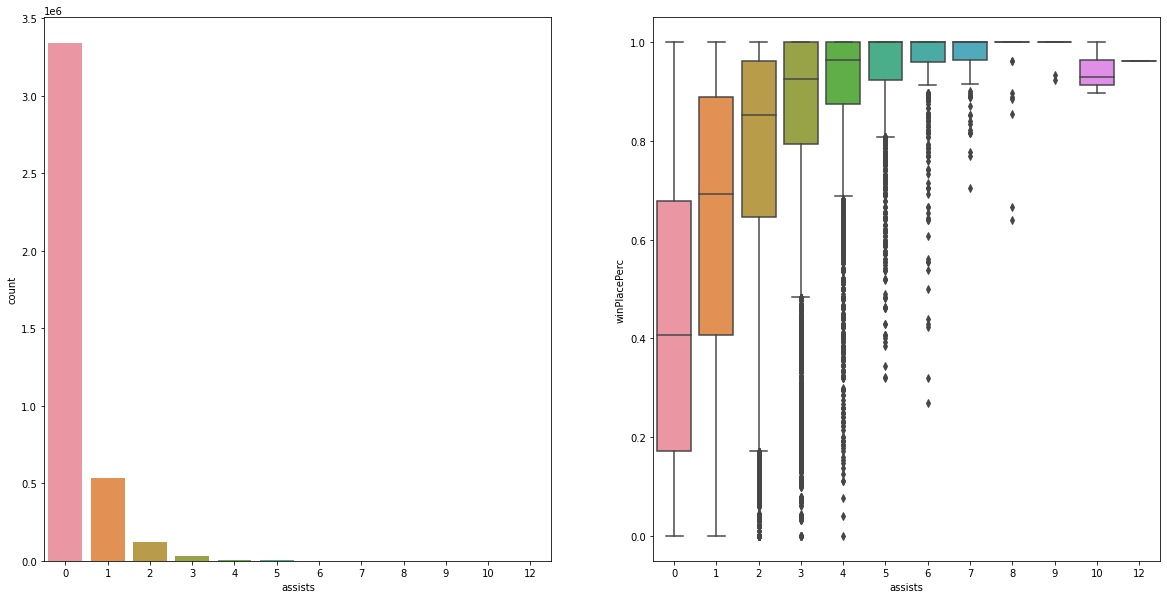

In [30]:
count_box('assists')

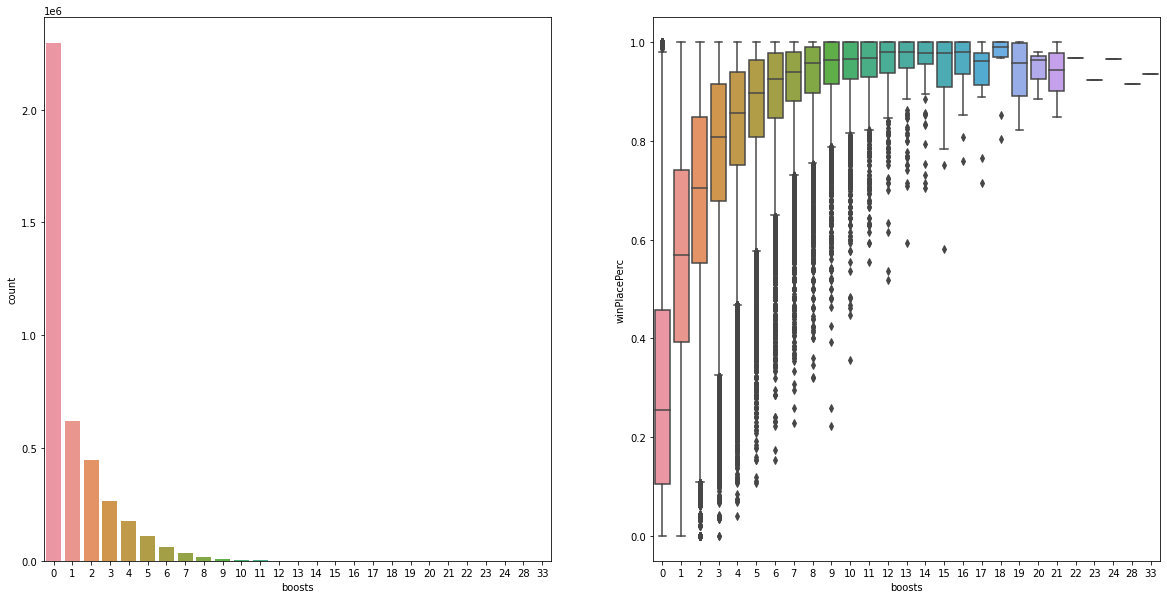

In [46]:
count_box('boosts')

In [ ]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
gridParams = {
    'num_leaves': [30,50,100], 'max_depth': [-1,7,15], 
    'min_data_in_leaf': [20,50,100],
    'lambda_l1': [0.2],
    'learning_rate': [0.001,0.003, 0.1], 'metric': ['mae'],
    "bagging_fraction" : [0.7]
    }
model = LGBMRegressor()
grid = GridSearchCV(model, gridParams,
                    verbose=1,
                    cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print("Best params:", grid.best_params_)
print("\nBest score:", grid.best_score_)
params = grid.best_params_

In [ ]:
new_model = grid.best_estimator_

In [ ]:
print("Prediction")
pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)


train_score = mean_absolute_error(y_train, pred_train)
test_score = mean_absolute_error(y_test, pred_test)

print("Train Score : %.4f" % train_score)
print("Test Score : %.4f" % test_score)